<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
The t-distribution and confidence interval of small sample sizes
              
</p>
</div>

Data Science Cohort Live NYC Aug 2024
<p>Phase 2</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [23]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

So given a population with:
- Mean $\mu$
- Standard deviation $\sigma$

#### Often faced with a situation where

- $\mu$ is unkown: something to be estimated by sampling 
- $\sigma$ is unknown.

Provide $N$ is large enough: 
 
- CLT give us ability to make some statements about sampling from population:


- Distribution of $\bar{X}$ of samples of size N: 
- Normal distribution with mean $\mu$ and std $\frac{\sigma}{\sqrt{N}}$

Or in terms of rescaled variables:
$$ Z = \frac{(\bar{X} - \mu)}{\sigma/\sqrt{N}} $$

follows the standardized normal distribution $N(0,1)$.

And as long as $N$ of sample used for mean estimation is large enough:

$$ Z = \frac{(\bar{X} - \mu)}{\sigma/\sqrt{N}} \approx \frac{(\bar{X} - \mu)}{s/\sqrt{N}}  $$ 

where $s^2$ is our sample variance:

$$ s^2 = \sum_{i=1}^{N}\frac{(X_i - \bar{X})^2}{N-1} $$


- And then apply CLT and use $Z$ for:
    - Confidence interval estimation

#### But when N is small...

This doesn't really work. Why?

Sample-to-sample fluctuations in $s$ appreciable:
- Let's see this for samples of various sizes drawn from the standard normal.

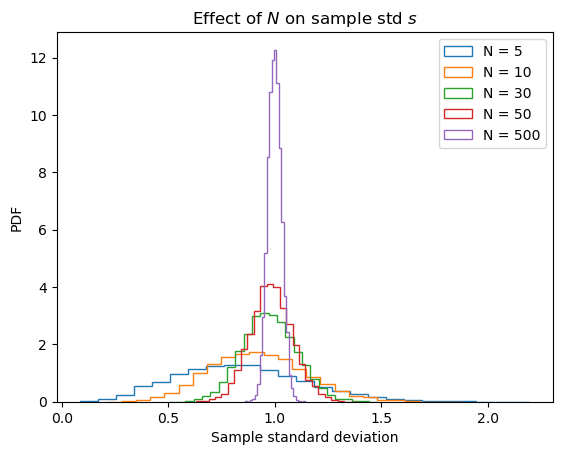

In [25]:
from scipy.stats import norm

N_list = [5,10, 30,50, 500]
for N in N_list:
    s_list = [norm.rvs(loc = 0, scale = 1, size = N).std() for trial in range(10000)]
    plt.hist(s_list, bins = 25, density = True, histtype = 'step', label = "N = " + str(N))

plt.legend()
plt.xlabel('Sample standard deviation')
plt.ylabel('PDF')
plt.title('Effect of $N$ on sample std $s$')
plt.show()

The sample standard deviation fluctuation amplifies for smaller sample size $N < 30$

$$ \frac{(\bar{X} - \mu)}{s/\sqrt{N}} $$

- $\bar{X}$ is random variable.
- $s$ must be treated as random variable.


$$t = \frac{(\bar{X} - \mu)}{s/\sqrt{N}} $$


- **CLT cannot be invoked to see how t distributed**
    - $t$ statistic is a composite random variable. 
    - N is small

If **population** normally distributed (or have good reason to believe this):

- t follows another distribution: **the standardized t-distribution**.
- correction to normal because:
    - $\sigma$ uncertain.
    - $s$ for a given sample fluctuates a lot about unknown $\sigma$

Import t distribution in scipy:
- Assumes underlying population distribution samples is normal. 
- Sampling distribution of **means** of sample size N w/ unknown population std

In [26]:
from scipy.stats import t

- pdf needs degree of freedom argument (df):
    - loc = 0, scale = 1 (standardized) default
    - $df = N - 1$ for t-distribution.

In [27]:

# define t pdf for a few degrees of freedom and normal
x = np.linspace(-4,4,400)
t_distribution5 = t.pdf(x, loc = 0, df = 4) # N = 5
t_distribution10 = t.pdf(x, loc = 0, df = 9) # N = 10 
t_distribution20 = t.pdf(x, loc = 0, df = 19) # N = 20
norm_distribution = norm.pdf(x, loc = 0, scale = 1)

In [5]:
%%capture tdistplot

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,t_distribution5, label = 't-distribution: df = 4' )
ax.plot(x,t_distribution10, label = 't-distribution: df = 9' )
ax.plot(x,t_distribution20, label = 't-distribution: df = 19' )
ax.plot(x,norm_distribution, label = 'normal')
ax.set_xlabel('t',  fontsize = 16)
ax.set_ylabel('PDF', fontsize = 16)
ax.set_title('t-distribution PDF approach to normal', fontsize = 18)
ax.legend()
plt.show()

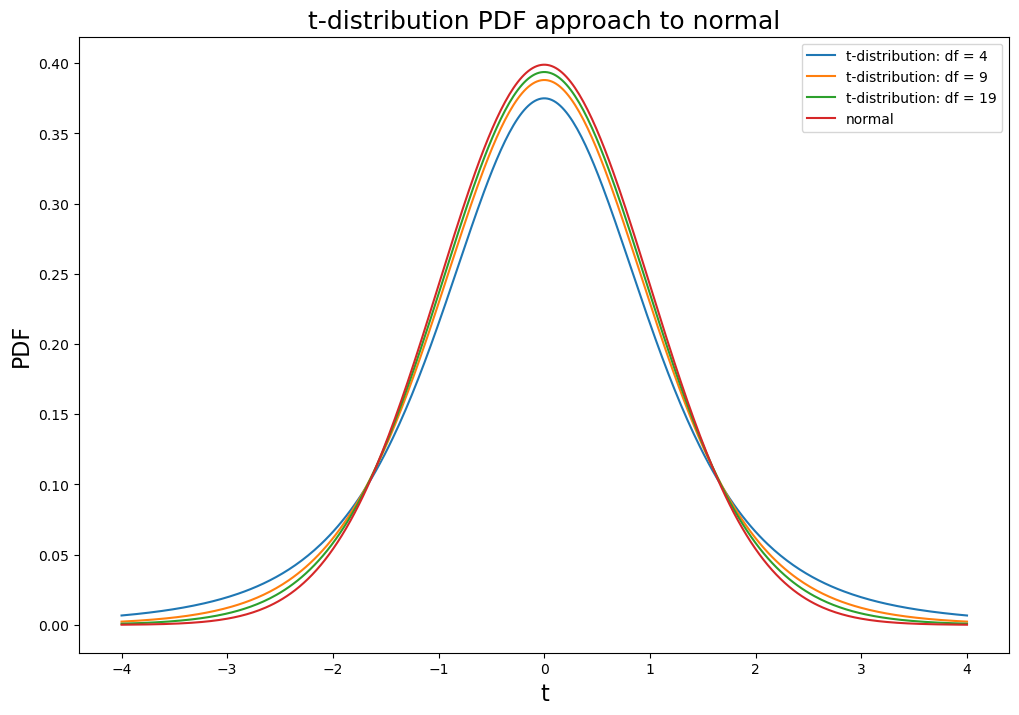

In [6]:
tdistplot()

Looks similar to normal: but tails are fatter.
- But area under tails:
    - can change confidence intervals at a given confidence level drastically
    - particularly for high confidence levels
        

 **Scenario**

 - Wildlife Conservation Society of Gabon: measured weights of $15$ African elephants in Gabon  

 Infer range of possible population means for the weight of Gabonese elephants at 0.95 confidence.

In [28]:
# We're given these values from the sample weights
gab = np.array([
        8234, 8929, 7922, 8688, 8840, 
        8759, 8127, 8574, 8533, 8944, 
        8631, 8665, 8712, 8984, 8601
])

N = len(gab)

Weights, heights, etc at the population level are often normally distributed.

#### Confidence Intervals: t-distribution

- Again, same idea as with Z-distribution
- Have sample: estimate population mean.
- Uncertainty in population mean

But $ N < 30$ and population distribution is assumed normal.

Confidence interval at confidence level $c$:
- Measure $\bar{X_0}$
- assuming underlying population is normally distributed

$$\bar{X_0} \pm t^* \frac{s}{\sqrt{N}} $$


- $c$ fraction of means lie in range $\pm t^*$ range in standardized t-distribution.


In [8]:

def plot_confidence_interval_t(c, N):
    
    x_scaled = np.linspace(-5,5,800)
    Y_scaled = t.pdf(x_scaled, df = N-1)

    fig,ax = plt.subplots()
    
    t_crit = np.abs(t.ppf((1 - c)/2, df = N - 1))

    ax.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
    ax.axvline(-t_crit, c = 'b')
    ax.axvline(t_crit, c = 'b')

    ax.fill_between(x_scaled, Y_scaled, where = (x_scaled > -t_crit )& (x_scaled < t_crit), alpha = 0.5, color='r')


    ax.annotate('c = 0.95', xytext = (-5.0,.25), xy = (-.5,.20), fontsize=16, arrowprops=dict(facecolor='r', shrink=0.05), c ='r' )
    ax.set_xlabel('t')
    ax.set_ylabel('PDF')
    ax.set_title('Confidence Interval: standardized t')
    plt.show()


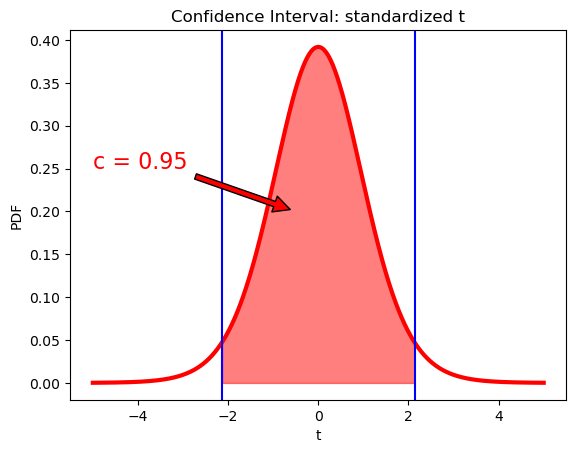

In [9]:
plot_confidence_interval_t(0.95, N)

Compute (-$t^*$, $t^*$) for given confidence level:
    

In [10]:
# 95% confidence interval
c = 0.95

In [11]:
# outputs (-t*, +t*)

# with no loc, scale assumes 
# standardized t
CI_norm = t.interval(c, df = N - 1)
CI_norm


(-2.1447866879169273, 2.1447866879169273)

Or can calculate t* the other way: 

In [12]:
t_star = np.abs(t.ppf((1-c)/2, df = N - 1))
t_star

2.1447866879169273

In [13]:
CI_norm

(-2.1447866879169273, 2.1447866879169273)

- sample mean $\bar{X_0}$ is our central estimate of population mean
- The confidence interval will then just be:
    
    As $$\bar{X_0} \pm t^* \frac{s}{\sqrt{N}}$$
   

In [29]:
# Remember our Galbonese elephant data
s = gab.std(ddof = 1)
s

305.14162207704396

In [30]:
N = len(gab)
N

15

In [16]:
Xbar0 = gab.mean()
Xbar0

8609.533333333333

To get our unscaled CI is easy now:
- multiply numpy array of lower/upper $t^*$ values
- by $s/\sqrt{N}$
- add sample mean $\bar{X}_0$

In [17]:
np.array(CI_norm)

array([-2.14478669,  2.14478669])

In [18]:
Xbar0 + np.array(CI_norm)*(s/np.sqrt(N))

array([8440.55153546, 8778.5151312 ])

Or can call the t.interval() method with loc and scale specified:

In [31]:
tdist_95CI = t.interval(c, loc = Xbar0, scale = (s/np.sqrt(N)), df = N - 1 )
tdist_95CI

(8440.551535463972, 8778.515131202694)

Let's compare this to what we would estimate if we had use the normal distribution.

In [33]:
from scipy.stats import norm
normdist_95CI = norm.interval(c, loc = Xbar0, scale = (s/np.sqrt(N)))

print(normdist_95CI, tdist_95CI)

(8455.113203941144, 8763.953462725522) (8440.551535463972, 8778.515131202694)


What about the interval at a 99.9% confidence level?

In [21]:
c2 = .999

print(norm.interval(c2, loc = Xbar0, 
                    scale = (s/np.sqrt(N))))


(8350.281853380922, 8868.784813285745)


In [22]:
print(t.interval(c2, loc = Xbar0,
                 scale = (s/np.sqrt(N)),
                 df = N - 1 ))

(8283.31843098068, 8935.748235685991)


A sizeable difference in confidence interval ranges!

Fluctuations in the standard deviation in the low N limit:
- will affect CI estimation at high confidence substantially